In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Test matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Test matrix shape (10000, 784)


In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Test matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Test matrix shape (10000, 10)


In [ ]:
model= Sequential()
model.add(Dense(784,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)
model.summary()

Epoch 1/10
469/469 [==============================] - 13s 25ms/step - loss: 0.2085 - accuracy: 0.9377
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0776 - accuracy: 0.9759
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0529 - accuracy: 0.9831
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0183 - accuracy: 0.9941
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0135 - accur

In [ ]:
score = model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 5ms/step - loss: 0.0757 - accuracy: 0.9841
Test score: 0.07568386197090149
Test accuracy: 0.9840999841690063


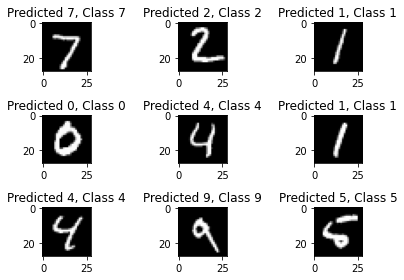

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  import sys


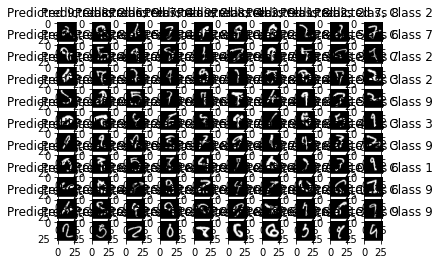

In [ ]:
plt.figure()
for i in range(100):
  plt.subplot(10,10,i+1)
  incorrect=incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()